In [1]:
!pip install plotly==5.7.0

In [207]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
import plotly.express as px
df = pd.read_csv("maps-synthetic-data-v1.1.csv")

In [208]:
myfield = df["has_dep_diag"]
freq = myfield.value_counts()
counts = freq.values
labels = freq.index.tolist()
percentages = freq/freq.sum()
cumulative = percentages.cumsum()
cumulative

 No ICD-10 diagnosis of depression    0.913805
Yes ICD-10 diagnosis of depression    1.000000
Name: has_dep_diag, dtype: float64

<ipython-input-209-706f357284e9>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



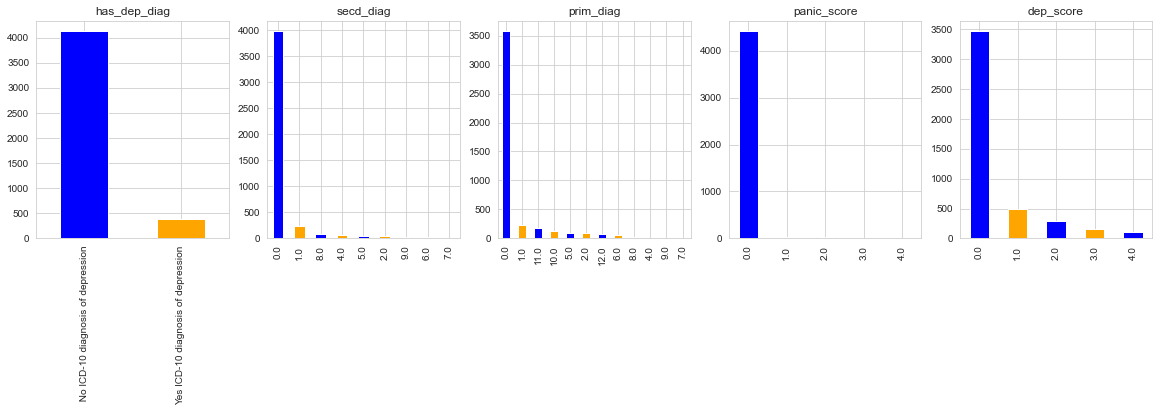

In [209]:
import seaborn as sns
sns.set_style("whitegrid")
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
cols = 5
rows = 1
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(20,4))
f=0
for i in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()


<ipython-input-210-ccedfb31aa29>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



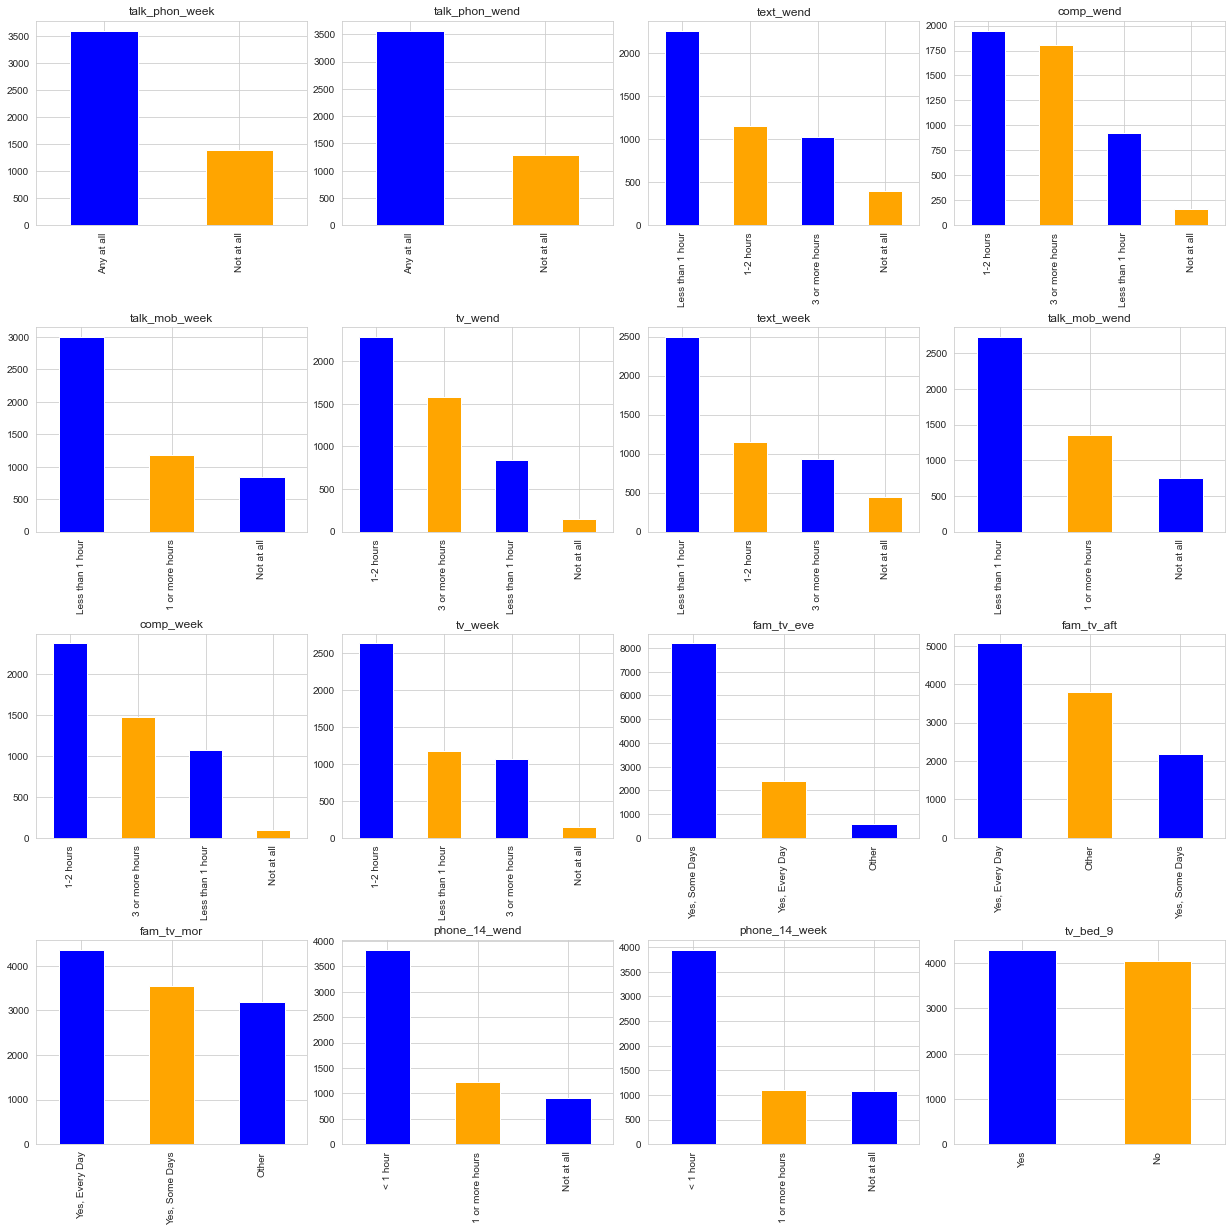

In [210]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(17,17),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()


In [211]:
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score","dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]

df['has_dep_diag'] = pd.Categorical(df.has_dep_diag)
df['secd_diag'] = pd.Categorical(df.secd_diag)
df['prim_diag'] = pd.Categorical(df.prim_diag)
df['panic_score'] = pd.Categorical(df.panic_score)
df['dep_score'] = pd.Categorical(df.dep_score)
df[categorical_features].describe(include='all')

,has_dep_diag,secd_diag,prim_diag,panic_score,dep_score,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07
count,4513,4513.0,4513.0,4513.0,4513.0,5299,7003,7679,8089,5303,7158,7852,8280
unique,2,9.0,12.0,5.0,5.0,5,5,5,4,5,6,6,5
top,No ICD-10 diagnosis of depression,0.0,0.0,0.0,0.0,~0.5%,<0.1%,<0.1%,<0.1%,~3%,~3%,~3%,~3%
freq,4124,3980.0,3573.0,4413.0,3463.0,2976,4022,4500,5050,2740,3821,4167,3907


In [212]:
percentages = []
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
df[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,4999,4850,4841,4839,5016,4853,5004,4834,5011,5020,11174,11038,11096,5962,6131,8348
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,Yes
freq,3602,3568,2261,1950,3001,2287,2495,2728,2375,2634,8199,5065,4360,3828,3949,4300


In [213]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
testdf = df.loc[df['has_dep_diag'] == "Yes ICD-10 diagnosis of depression"]
testdf[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,253,250,249,247,256,249,254,249,256,256,351,351,343,271,278,321
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,3 or more hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,176,177,102,99,148,112,114,141,116,136,242,149,133,169,171,175


In [214]:
testdf2 = df.loc[df['has_dep_diag'] == " No ICD-10 diagnosis of depression"]
testdf2[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,2899,2837,2834,2830,2908,2836,2899,2827,2907,2909,3696,3647,3668,2964,3051,3402
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,2084,2106,1395,1155,1813,1352,1534,1663,1369,1541,2580,1630,1484,1941,2004,1959


{'talk_phon_week': 0.02321640145777404, 'talk_phon_wend': 0.0343334508283398, 'text_wend': 0.04129928323031008, 'comp_wend': 0.006904050013590648, 'talk_mob_week': 0.030218363136176086, 'tv_wend': 0.01622569261531315, 'text_week': 0.04016454221249249, 'talk_mob_wend': 0.014660694422543382, 'comp_week': 0.024231649896800826, 'tv_week': 0.013175033301821942, 'fam_tv_eve': 0.014013764013763986, 'fam_tv_aft': 0.01644823269903244, 'fam_tv_mor': 0.01962922573609599, 'phone_14_wend': 0.0354919136235897, 'phone_14_week': 0.027817274204235437, 'tv_bed_9': 0.03066640294054629}


<BarContainer object of 16 artists>

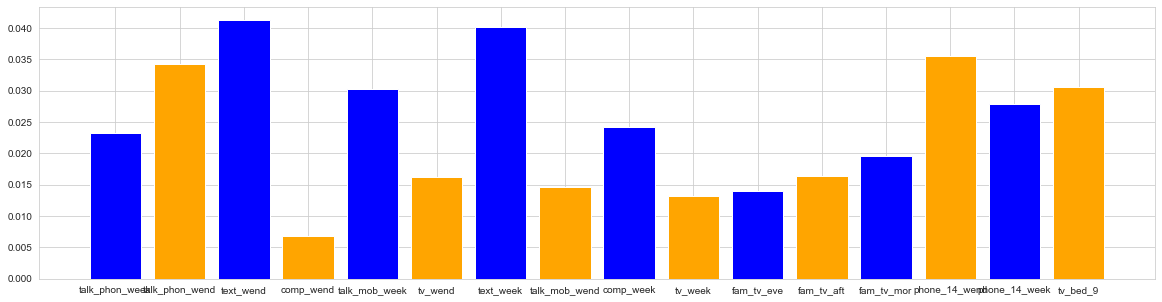

In [215]:
sns.set_style("whitegrid")
avg_percent_diff = {}
for category in categorical_features:
    percentages = testdf2[category].value_counts() / testdf2[category].value_counts().sum()
    percentages2 = testdf[category].value_counts() / testdf[category].value_counts().sum()
    output = percentages.copy()
    total = 0
    for i in range(len(output)):
        total += abs(percentages[i]- percentages2[i])
    avg = total/len(output)
    avg_percent_diff[category]= avg
    #percentages[0] =percentages[0] - percentages2[0]
    #print(percentages[0])
print(avg_percent_diff)
names = list(avg_percent_diff.keys())
values = list(avg_percent_diff.values())
f, ax = plt.subplots(figsize=(20,5))
plt.bar(range(len(avg_percent_diff)), values, tick_label=names,color=['blue', 'orange'])

<ipython-input-216-3287077c93bb>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



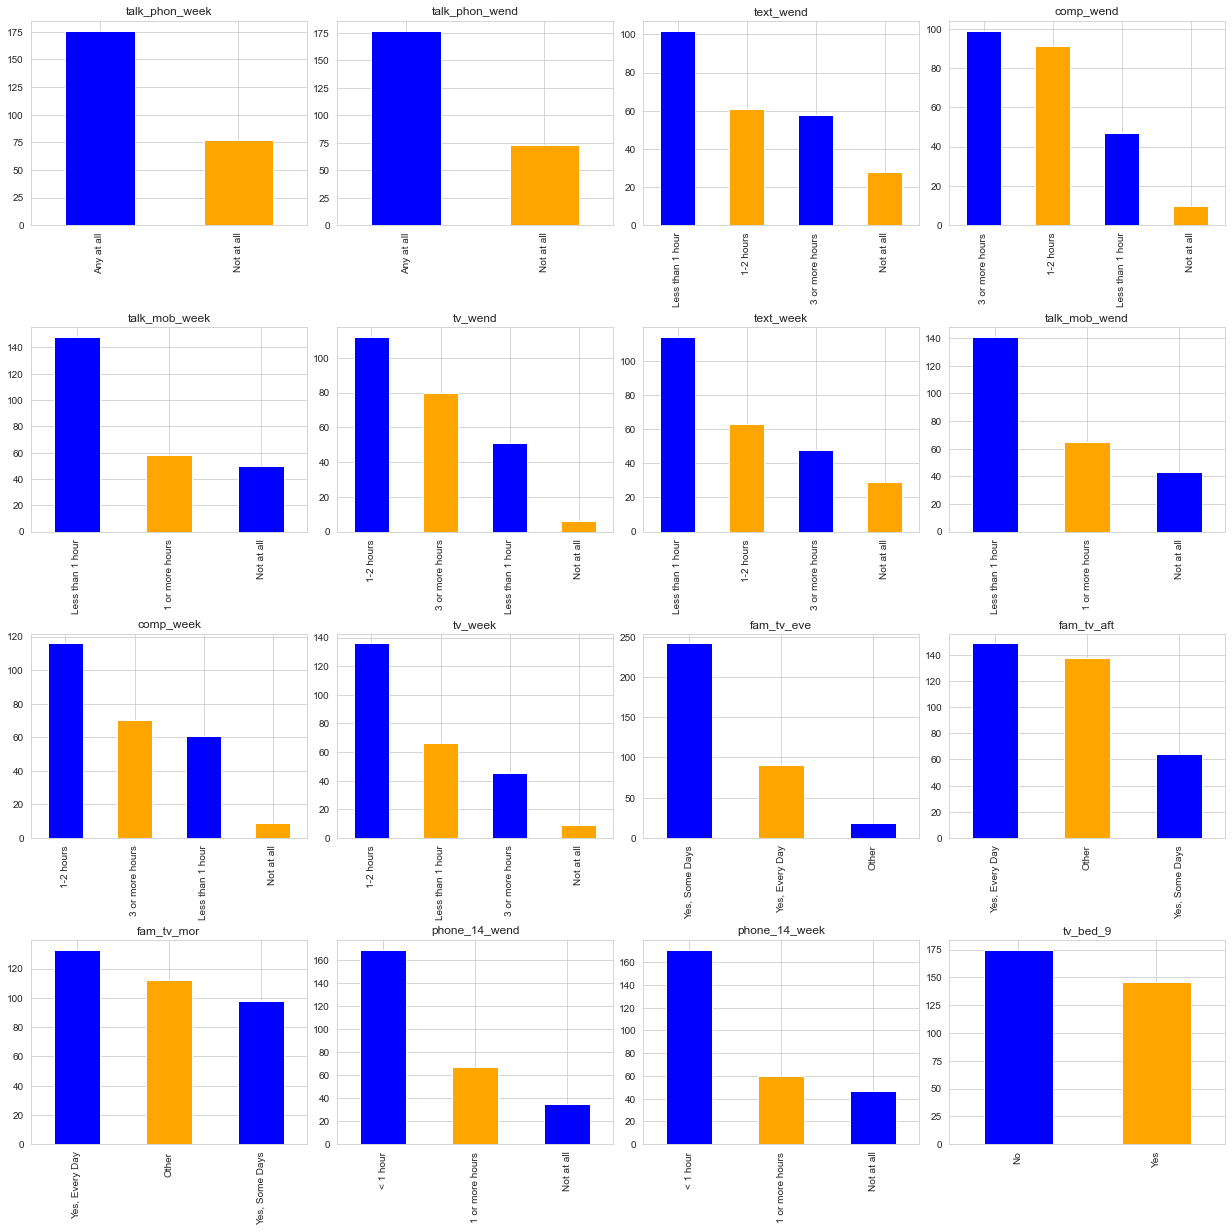

In [216]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(17,17),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        testdf[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()

<Figure size 1080x1080 with 0 Axes>

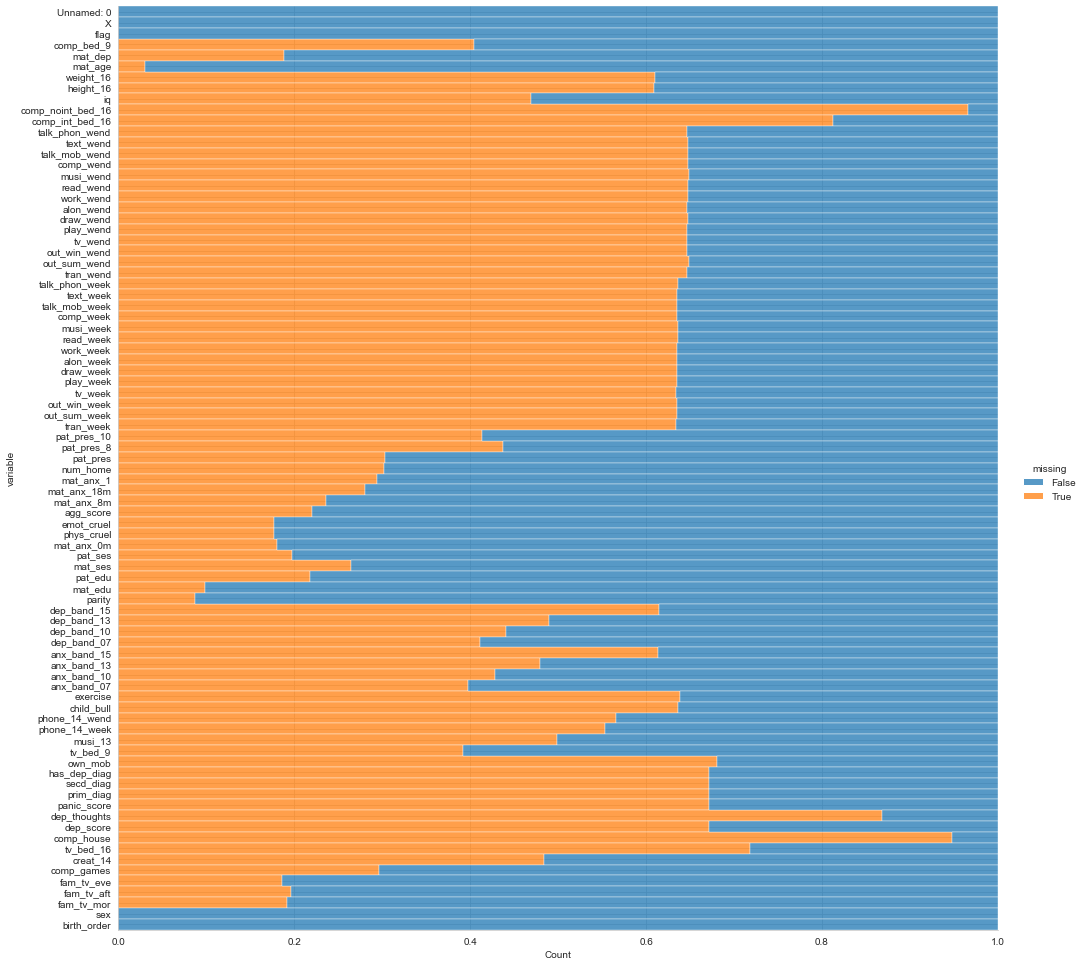

In [217]:
plt.figure(figsize=(15,15))
g = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3
)
g.fig.set_size_inches(15,15)

               0
count  85.000000
mean    0.482574
std     0.235299
min     0.000000
25%     0.293724
50%     0.613878
75%     0.646862
max     0.965706
-0.5401155460353062


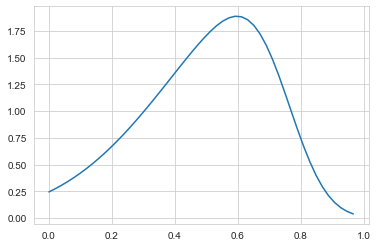

In [218]:
from scipy.stats import skew
percentages = []
for col in df.columns:
    percentages.append(df[col].isnull().sum()/len(df[col]))
df_describe = pd.DataFrame(percentages)
df_describe.describe()
print(df_describe.describe())
print(skew(percentages))

X = np.linspace(min(percentages), max(percentages))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(percentages)))

shows comp_no_int can be removed and comphouse and dep thoughts. aka set the threshhold to 70% as important vartiables are at 67%


In [232]:
from scipy import stats
from scipy.stats import chi2_contingency
passing_has_dep=[]
for col in df.columns:
    contingency = pd.crosstab(index=df[col], columns=df['has_dep_diag'],margins=True)
    stat, p, dof, expected = chi2_contingency(contingency)
  
    alpha = 0.05
    #print("p value for "+col+" is " + str(p))
    if p <= alpha:
        #print("p value for "+col+" is " + str(p))
        #print('Dependent (reject H0)')
        passing_has_dep.append(col)
    else:
        #print('Independent (H0 holds true)')
        hello=1
passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for dep in depressedcols:
    for col in df.columns:
        contingency = pd.crosstab(index=df[col], columns=df[dep],margins=True)
        stat, p, dof, expected = chi2_contingency(contingency)

        alpha = 0.025
        #print("p value for "+col+" is " + str(p))
        if p <= alpha:
            #print("p value for "+col+" is " + str(p))
            #print('Dependent (reject H0)')
            if col not in passing_all_deps:
                passing_all_deps.append(col)
        else:
            #print('Independent (H0 holds true)')
            hello=1
print(passing_has_dep)
print(passing_all_deps)

['parity', 'dep_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex']
['agg_score', 'dep_band_15', 'dep_band_10', 'anx_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex', 'birth_order', 'pat_edu', 'child_bull', 'mat_age', 'anx_band_07', 'mat_anx_0m']
